In [2]:
# Modules
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Setup environment and update dictionary
!source setup_project.sh

# Set options
pd.set_option("display.max_rows", 200)

/bin/sh: 1: ./setup_project.sh: Permission denied


In [3]:
# Load rebel manifesto data
manifesto_dictionary = pd.read_pickle('../data/manifesto_dictionary.pkl')
manifesto_dictionary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197 entries, 906 to 2196
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country        2197 non-null   object        
 1   group          2197 non-null   object        
 2   date           2074 non-null   datetime64[ns]
 3   year           2074 non-null   period[A-DEC] 
 4   source_type    2197 non-null   object        
 5   document_type  2189 non-null   object        
 6   description    2152 non-null   object        
 7   author         85 non-null     object        
 8   language       2197 non-null   object        
 9   file_path      2197 non-null   object        
 10  file_name      2197 non-null   object        
 11  file_type      2197 non-null   object        
dtypes: datetime64[ns](1), object(10), period[A-DEC](1)
memory usage: 223.1+ KB


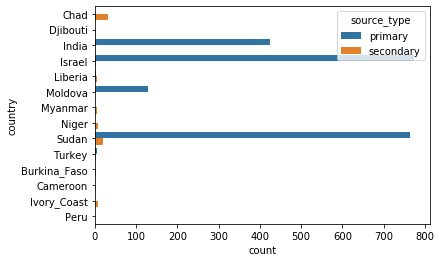

In [4]:
# Exploratory plots
blue = sns.color_palette('tab10')[0]
orange = sns.color_palette('tab10')[1]

# Sources by country
sns.countplot(y='country', hue='source_type', data=manifesto_dictionary)

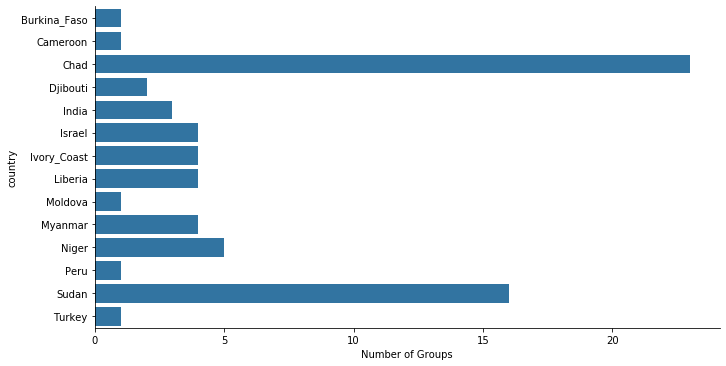

In [5]:
# Number of groups by country
cgs_counts = manifesto_dictionary.groupby(['country'])['group'].nunique()
cgs_counts = cgs_counts.to_frame(name='Number of Groups').reset_index()
sns.catplot(x='Number of Groups', y='country', data=cgs_counts,
            kind='bar', color=blue, aspect=2)

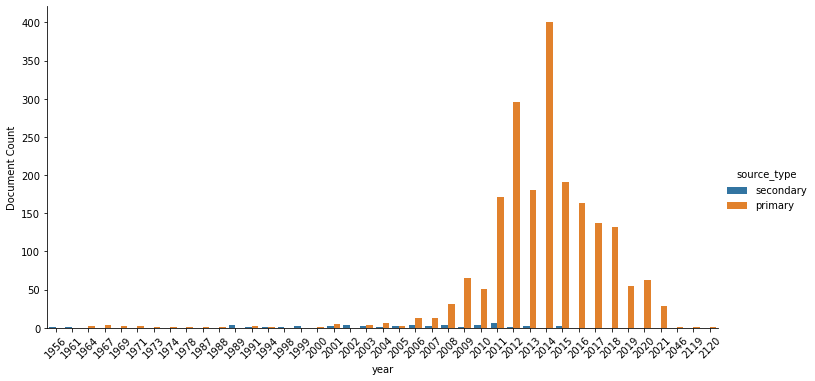

In [6]:
sy_counts = manifesto_dictionary.groupby(['year'])['source_type'].value_counts()
sy_counts = sy_counts.to_frame(name='Document Count').reset_index()
g = sns.catplot(x='year', y='Document Count', hue='source_type', 
                kind='bar', data=sy_counts, aspect=2)
g.set_xticklabels(rotation=45)

In [7]:
# Examine language and primary counts for subset of groups
is_primary = manifesto_dictionary['source_type'] == 'primary'
manifesto_dictionary[is_primary]

,country,group,date,year,source_type,document_type,description,author,language,file_path,file_name,file_type
906,Chad,CNR,2005-11-30,2005,primary,interview,NaN,NaN,EN,Chad/CNR/primary/None_interview_2005-11-30.docx,None_interview_2005-11-30.docx,docx
2096,Djibouti,FRUD-AD,2001-05-12,2001,primary,agreement,AgreementForReformCivilConcord,NaN,EN,Djibouti/FRUD-AD/primary/AgreementForReformCiv...,AgreementForReformCivilConcord_agreement_2001-...,pdf
908,India,CPI-Maoist,2019-07-24,2019,primary,Statement,MsgOn50thAnniversaryOfParty,NaN,EN,India/CPI-Maoist/primary/MsgOn50thAnniversaryO...,MsgOn50thAnniversaryOfParty_Statement_2019-07-...,pdf
909,India,CPI-Maoist,2018-12-28,2018,primary,NewsReport,MaoistsInKeralaShunMobilePhones,NaN,EN,India/CPI-Maoist/primary/MaoistsInKeralaShunMo...,MaoistsInKeralaShunMobilePhones_NewsReport_201...,pdf
910,India,CPI-Maoist,2010-06-01,2010,primary,Statement,JnaneswariExpress,NaN,EN,India/CPI-Maoist/primary/JnaneswariExpress_Sta...,JnaneswariExpress_Statement_2010-06-01.pdf,pdf
...,...,...,...,...,...,...,...,...,...,...,...,...
2097,Turkey,PKK,NaT,NaT,primary,chronology,Chronology,NaN,TR,Turkey/PKK/primary/Chronology_chronology_[TR].pdf,Chronology_chronology_[TR].pdf,pdf
2098,Turkey,PKK,NaT,NaT,primary,manifesto,Manifesto,NaN,TR,Turkey/PKK/primary/Manifesto_manifesto_[TR].pdf,Manifesto_manifesto_[TR].pdf,pdf
2099,Turkey,PKK,NaT,NaT,primary,article,4.1,NaN,TR,Turkey/PKK/primary/4.1_article_[TR].pdf,4.1_article_[TR].pdf,pdf
2100,Turkey,PKK,1991-05-15,1991,primary,article,Kongre,NaN,TR,Turkey/PKK/primary/Kongre_article_[TR]_1991-05...,Kongre_article_[TR]_1991-05-15.pdf,pdf


In [11]:
groups = manifesto_dictionary['group'].isin(['CPI-Maoist', 'PFLP', 'PMR', 'JEM'])
manifesto_dictionary[is_primary & groups]

,country,group,date,year,source_type,document_type,description,author,language,file_path,file_name,file_type
908,India,CPI-Maoist,2019-07-24,2019,primary,Statement,MsgOn50thAnniversaryOfParty,NaN,EN,India/CPI-Maoist/primary/MsgOn50thAnniversaryO...,MsgOn50thAnniversaryOfParty_Statement_2019-07-...,pdf
909,India,CPI-Maoist,2018-12-28,2018,primary,NewsReport,MaoistsInKeralaShunMobilePhones,NaN,EN,India/CPI-Maoist/primary/MaoistsInKeralaShunMo...,MaoistsInKeralaShunMobilePhones_NewsReport_201...,pdf
910,India,CPI-Maoist,2010-06-01,2010,primary,Statement,JnaneswariExpress,NaN,EN,India/CPI-Maoist/primary/JnaneswariExpress_Sta...,JnaneswariExpress_Statement_2010-06-01.pdf,pdf
911,India,CPI-Maoist,2017-06-17,2017,primary,Statement,AppealToRightsActivists,NaN,EN,India/CPI-Maoist/primary/AppealToRightsActivis...,AppealToRightsActivists_Statement_2017-06-17.txt,txt
912,India,CPI-Maoist,2012-01-13,2012,primary,Statement,OnKishenjisMartyrdom,NaN,EN,India/CPI-Maoist/primary/OnKishenjisMartyrdom_...,OnKishenjisMartyrdom_Statement_2012-01-13.txt,txt
...,...,...,...,...,...,...,...,...,...,...,...,...
2082,Sudan,JEM,2018-01-01,2018,primary,statement,AccountInventoryForTheSudanSThirdRevolutionTha...,NaN,EN,Sudan/JEM/primary/AccountInventoryForTheSudanS...,AccountInventoryForTheSudanSThirdRevolutionTha...,txt
2083,Sudan,JEM,2020-05-01,2020,primary,statement,SouthSudanMediatorCondemnsAllegationsOfTerrori...,NaN,EN,Sudan/JEM/primary/SouthSudanMediatorCondemnsAl...,SouthSudanMediatorCondemnsAllegationsOfTerrori...,txt
2084,Sudan,JEM,2016-09-02,2016,primary,statement,FailureOfIslamicState,NaN,EN,Sudan/JEM/primary/FailureOfIslamicState_statem...,FailureOfIslamicState_statement_2016-09-02.txt,txt
2085,Sudan,JEM,2018-10-01,2018,primary,statement,TalesOfTheTombstonesTheDiscriminationAgainstSu...,NaN,EN,Sudan/JEM/primary/TalesOfTheTombstonesTheDiscr...,TalesOfTheTombstonesTheDiscriminationAgainstSu...,txt
